In [2]:
import pandas as pd
import numpy as np

In [3]:
df_clean = pd.read_csv("C:\скил\DST-156\IDE_NEW\Домашнее задание. Этап 1/books_v2.csv")
df_clean.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,title_ser,num_in_ser,month,day,year,century,num_coauthors,pages_category,ar_fillna,np_fillna,publisher_fillna
0,Harry Potter and the Chamber of Secrets,J.K. Rowling,4.42,eng,352.0,6333,244,11/1/2003,Scholastic,Harry Potter,2,11,1,2003,21,1,от 100 до 500 стр.,4.42,352.0,Scholastic
1,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,other,152.0,19,1,4/26/2005,Nimble Books,-,0,4,26,2005,21,1,от 100 до 500 стр.,3.74,152.0,Nimble Books
2,The Hitchhiker's Guide to the Galaxy,Douglas Adams,4.22,eng,215.0,4930,460,8/3/2004,Crown,Hitchhiker's Guide to the Galaxy,1,8,3,2004,21,1,от 100 до 500 стр.,4.22,215.0,Crown
3,Bill Bryson's African Diar,Bill Bryson,3.44,eng,55.0,7270,499,12/3/2002,Broadway Books,-,0,12,3,2002,21,1,до 100 стр.,3.44,55.0,Broadway Books
4,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,3.87,eng,256.0,2088,131,9/14/2004,Broadway Books,-,0,9,14,2004,21,1,от 100 до 500 стр.,3.87,256.0,Broadway Books


Датасэт содержит данные о книгах с сайта Goodreaders. Описание колонок:

title - название книги

authors - автор книги

average_rating - рейтинг книги по данным сайта Goodreaders

language_code - язык книги (eng, other)

num_pages - количество страниц

ratings_count - количество пользователей поставивших оценку книге

text_reviews_count - количество пользовательских рецензий на книгу

publication_date - дата публикации (м/д/г)

publisher - издатель

title_ser - название серии (если книга не входит в серию, то -)

num_in_ser - номер книги в серии (если книга не входит в серию, то 0)

month - месяц публикации книги

day - день публикации книги

year - год публикации книги

century - век публикации книги

num_coauthors - количество соавторов книги

pages_category - категория книги по количеству страниц (до 100 стр.;от 100 до 500 стр.;от 500 до 1000 стр.;от 1000 стр.)

ar_fillna - признак с average_rating с замененными NaN

np_fillna - признак с num_pages с замененными NaN

publisher_fillna - признак с publisher с замененными NaN

In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8710 entries, 0 to 8709
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               8710 non-null   object 
 1   authors             8710 non-null   object 
 2   average_rating      7373 non-null   float64
 3   language_code       8710 non-null   object 
 4   num_pages           7156 non-null   float64
 5   ratings_count       8710 non-null   int64  
 6   text_reviews_count  8710 non-null   int64  
 7   publication_date    8710 non-null   object 
 8   publisher           8220 non-null   object 
 9   title_ser           8710 non-null   object 
 10  num_in_ser          8710 non-null   int64  
 11  month               8710 non-null   int64  
 12  day                 8710 non-null   int64  
 13  year                8710 non-null   int64  
 14  century             8710 non-null   int64  
 15  num_coauthors       8710 non-null   int64  
 16  pages_

Вопрос 1

Оцените линейную регрессию, уравнение которой имеет следующий вид:

ratings_counti=wo^+w1^⋅num_in_seri


где нижние индексы обозначают значения соответствующих переменных для наблюдения i

В ответ выпишите оценку коэффициента w0^

. Ответ округлите до сотых.

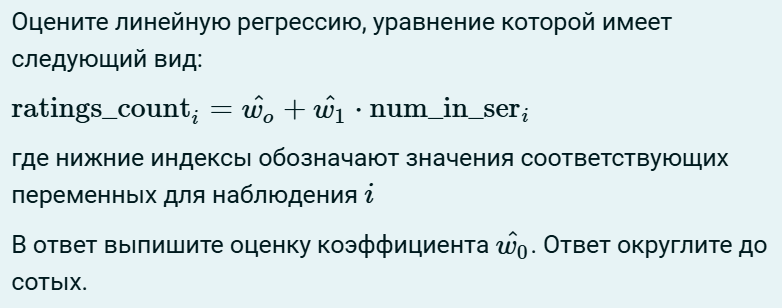

In [5]:
import statsmodels.api as sm

X = sm.add_constant(df_clean[['num_in_ser']])  # предиктор/независимая переменная
Y = df_clean['ratings_count']                                       # целевая переменная/зависимая переменная
model = sm.OLS(Y, X).fit()        

In [6]:
round(model.params,2)

const         6263.69
num_in_ser     153.54
dtype: float64

Вопрос 2

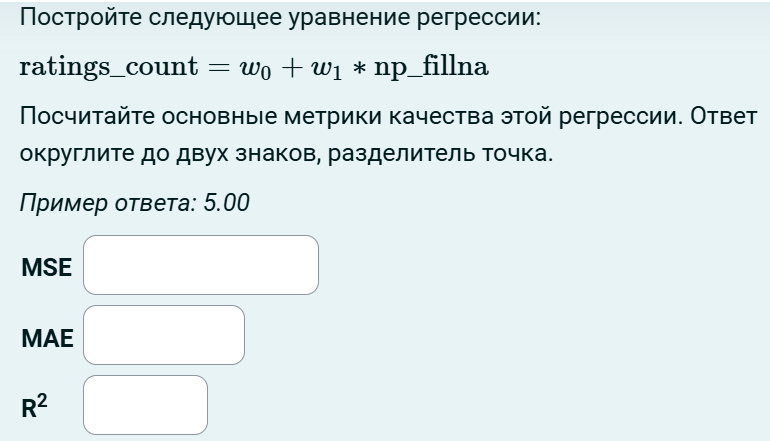


In [7]:
X_2 = sm.add_constant(df_clean[['np_fillna']])  # предиктор/независимая переменная
Y_2 = df_clean['ratings_count']                                       # целевая переменная/зависимая переменная
model_2 = sm.OLS(Y_2, X_2).fit()  

In [8]:
round(model_2.params,2)

const        2736.19
np_fillna      12.88
dtype: float64

In [9]:
round(model_2.rsquared,2) # R2

0.01

In [10]:
Y_pr_2 = model_2.predict(X_2)
MSE_2 = sum((Y_2-Y_pr_2)**2)/len(Y_2)
round(MSE_2,2)

266584749.11

In [11]:
Y_pr_2 = model_2.predict(X_2)
MAE_2 = sum(abs(Y_2-Y_pr_2))/len(Y_2)
round(MAE_2,2)

8426.65

Самостоятельная работа IV

In [12]:
df_clean_11111 = pd.read_csv("C:\скил\DST-156\IDE_NEW\Домашнее задание. Этап 1/t5.csv")
df_clean_11111.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,1,393,6.4,1872,67,1122,40,0,4
1,OnePlus 9,1,268,4.7,1331,42,944,47,1,3
2,Xiaomi Mi 11,1,154,4.0,761,32,322,42,0,2
3,Google Pixel 5,1,239,4.8,1676,56,871,20,0,3
4,iPhone 12,0,187,4.3,1367,58,988,31,1,3


Постройте модель линейной регрессии, которая показывает как количество приложений на телефоне (Number of Apps Installed) оказывает влияние на время проводимое в мобильных приложениях (App Usage Time (min/day)). Укажите в качестве ответов значение свободного коэффициента (С7) и коэффициент детерминации (R2) полученной регрессии (С8). 

Ответ округлите до двух знаков. Разделитель точка.

In [13]:
X_2_11 = sm.add_constant(df_clean_11111[['Number of Apps Installed']])  # предиктор/независимая переменная
Y_2_11 = df_clean_11111['App Usage Time (min/day)']                                       # целевая переменная/зависимая переменная
model_11 = sm.OLS(Y_2_11, X_2_11).fit()  

In [14]:
round(model_11.params,2)

const                      -47.28
Number of Apps Installed     6.28
dtype: float64

In [15]:
round(model_11.rsquared,2) # R2

0.91